In [33]:
import pandas as pd; pd.set_option('display.max_rows', 500)

from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib
import torchvision

import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [38]:
#"DJIFlightRecord_2018-09-07_[11-36-38][1]-TxtLogToCsv.csv"
log = "DJIFlightRecord_2018-09-08_15-08-46-TxtLogToCsv.csv"

actions_df = pd.read_csv("../../logs/"+log).fillna(0); len(actions_df)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,271) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4077

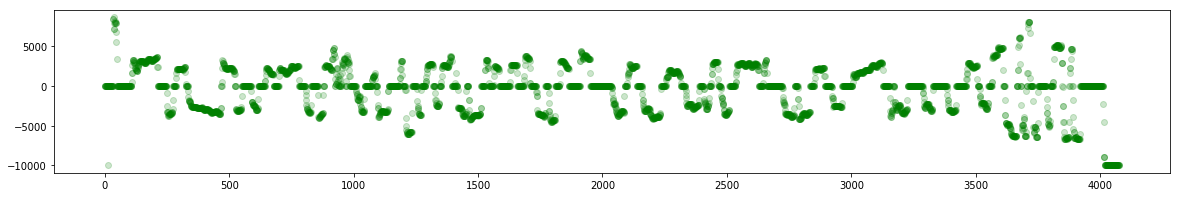

In [39]:
# Testing raw data from 256

seq = actions_df["RC.throttle"]
# Plotting a random z component over time
plt.figure(figsize=(20,3))

# all models
plt.plot(np.arange(len(seq)), seq, 'go', alpha=0.2, markerfacecolor='green')

plt.show()

In [40]:
cols = ["CAMERA_INFO.videoRecordTime", "RC.aileron", "RC.elevator", "RC.throttle", "RC.rudder"]

actions_df = actions_df[actions_df["CAMERA_INFO.recordState"]=="Starting"][cols]; 
actions_df["action_ix"]=range(len(actions_df)); actions_df.head()

,CAMERA_INFO.videoRecordTime,RC.aileron,RC.elevator,RC.throttle,RC.rudder,action_ix
90,0,0.0,0.0,0.0,0.0,0
91,0,0.0,0.0,0.0,0.0,1
92,0,0.0,0.0,0.0,0.0,2
93,0,0.0,0.0,0.0,0.0,3
94,0,0.0,0.0,0.0,0.0,4


In [41]:
actions_df["RC.throttle"].min()

-6727.0

In [43]:
# Loading z seqs from VAE. Same shape, essence as sine waves above.

#"z_seq_sequential_9.7.pt"
z_seq_file = "z_seq_sequential_9.8.pt"

z_seq = torch.load(z_seq_file); print(z_seq.shape)

df_vid = pd.DataFrame({"frame":range(len(z_seq))}); df_vid.head()

(10194, 100)


,frame
0,0
1,1
2,2
3,3
4,4


In [44]:
al = len(actions_df); al
vl = len(df_vid); vl

10194

In [45]:
ls = np.linspace(0, al, vl); print(len(ls))
j = np.round(ls, 0).astype(int); print(len(j))
df_vid["action_ix"] = j

10194
10194


In [52]:
a = pd.merge(df_vid, actions_df, how="left", on="action_ix").fillna(0); len(a)

10194

In [53]:
actions = torch.tensor(a["RC.throttle"]).unsqueeze(1)

In [44]:
# If catting to zs
# torch.cat([actions, torch.tensor(z_seq)], dim=1).shape

torch.Size([2532, 101])

In [54]:
# Saving entire sequence of actions, to be loaded together w z seqs
torch.save(actions, "actions_sequential_9.8.pt")

In [47]:
actions.shape # same size as z seqs, can be easily concatenated on. 

torch.Size([2532, 1])

In [50]:
actions

tensor([[0.0000],
        [0.0000],
        [0.0000],
        ...,
        [0.0000],
        [   nan],
        [   nan]])